# Exploratory Data Analises

In [2]:
!pip3 install pandas
!pip3 install seaborn
!pip3 install numpy
!pip3 install plotly


     |████████████████████████████████| 26.5 MB 4.8 MB/s eta 0:00:01     |██████████████████████████████▋ | 25.3 MB 6.9 MB/s eta 0:00:01


In [15]:
import numpy as np  
import pandas as pd
import plotly
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image


In [16]:
data = pd.read_csv("dataset/dataset.csv")

In [17]:
print(data.shape)

(23705, 5)


In [18]:
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [19]:
data = data.drop("img_name",axis=1)

In [20]:
data.head()

,age,ethnicity,gender,pixels
0,1,2,0,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,202 205 209 210 209 209 210 211 212 214 218 21...


In [22]:
data.isnull().sum()

age          0
ethnicity    0
gender       0
pixels       0
dtype: int64

In [23]:
def summary(data):
    print("\n Shape: ")
    print(data.shape)
    print("\n\n --------- ")
    print("\n Number of null values: ")
    print(data.isnull().sum())
    print("\n\n --------- ")
    print("\n Value count of age: ")
    print(data['age'].value_counts())
    print("\n\n --------- ")
    print("\n Value count of ethnicity: ")
    print(data['ethnicity'].value_counts())
    print("\n\n --------- ")
    print("\n Value count of gender: ")
    print(data['gender'].value_counts())


In [24]:
summary(data)


 Shape: 
(23705, 4)


 --------- 

 Number of null values: 
age          0
ethnicity    0
gender       0
pixels       0
dtype: int64


 --------- 

 Value count of age: 
26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
111       1
103       1
Name: age, Length: 104, dtype: int64


 --------- 

 Value count of ethnicity: 
0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64


 --------- 

 Value count of gender: 
0    12391
1    11314
Name: gender, dtype: int64


In [25]:
columns = ["age", "gender", "ethnicity"]
y = data.drop("pixels", axis=1)
x = data.drop(columns, axis=1)


In [26]:
x.head()

,pixels
0,129 128 128 126 127 130 133 135 139 142 145 14...
1,164 74 111 168 169 171 175 182 184 188 193 199...
2,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,193 197 198 200 199 200 202 203 204 205 208 21...
4,202 205 209 210 209 209 210 211 212 214 218 21...


In [27]:
y.head()

,age,ethnicity,gender
0,1,2,0
1,1,2,0
2,1,2,0
3,1,2,0
4,1,2,0


In [28]:
y.nunique()

age          104
ethnicity      5
gender         2
dtype: int64

In [29]:
dados_plotagem_y = y

In [30]:
dados_plotagem_y.ethnicity = y.ethnicity.replace({0:"white",1:"black",2:"Asian",3:"Indian",4:"Other"})

In [31]:
dados_plotagem_y.head()

,age,ethnicity,gender
0,1,Asian,0
1,1,Asian,0
2,1,Asian,0
3,1,Asian,0
4,1,Asian,0


In [32]:
dados_plotagem_y.gender = y.gender.replace({0: "male", 1: "female"})
dados_plotagem_y.head()


,age,ethnicity,gender
0,1,Asian,male
1,1,Asian,male
2,1,Asian,male
3,1,Asian,male
4,1,Asian,male


/Users/bentolima/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/bentolima/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/bentolima/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

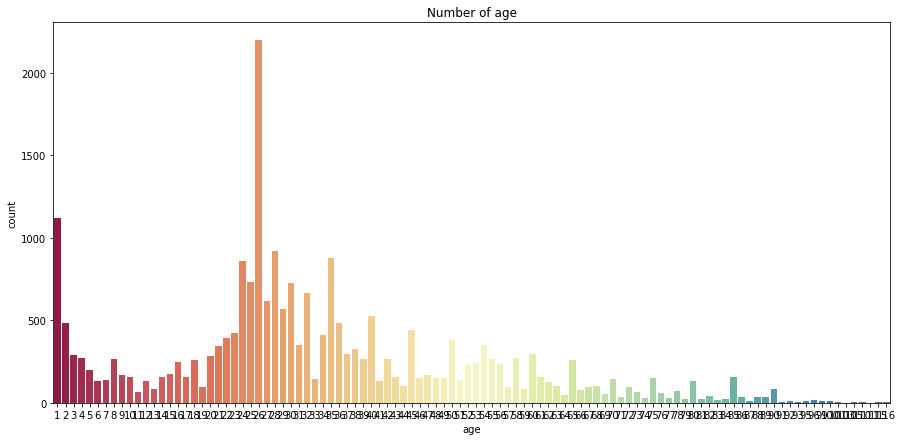

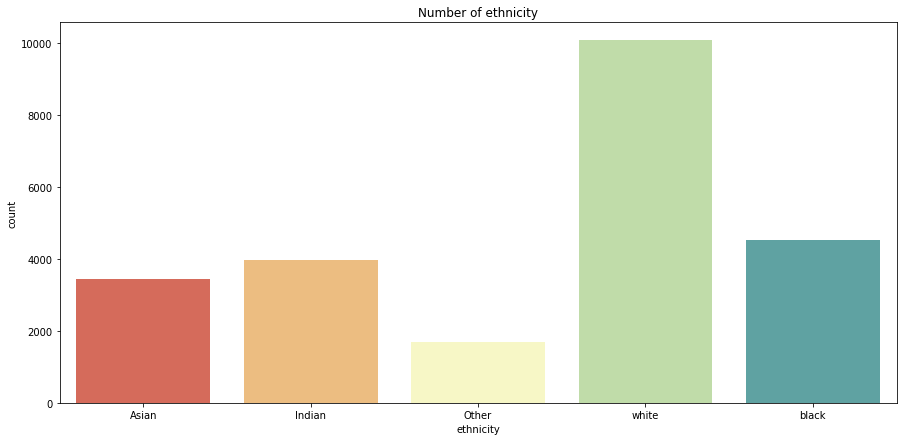

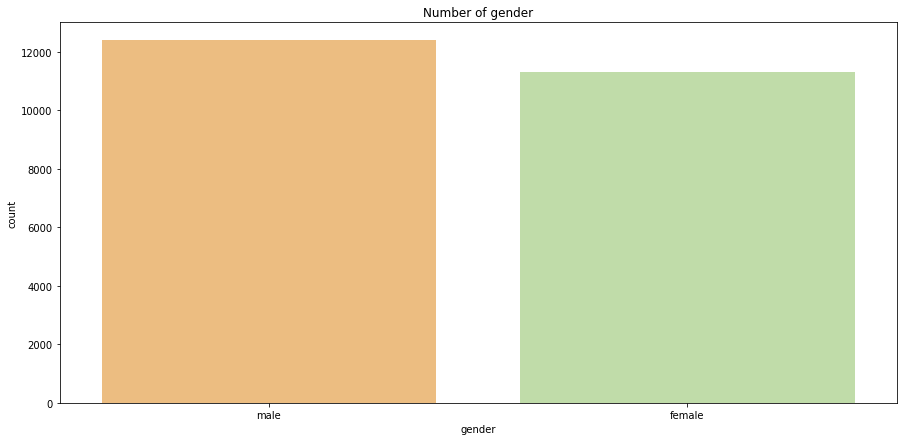

In [33]:
for i in dados_plotagem_y.columns:
    plt.figure(figsize=(15, 7))
    g = sns.countplot(y[i], palette="Spectral")
    plt.title("Number of {}".format(i))


### Image Shape

In [34]:
columns = ["age", "gender", "ethnicity"]
y = data.drop("pixels", axis=1)
x = data.drop(columns, axis=1)


In [35]:
num_pixels = len(x['pixels'][0].split(" "))
img_height = int(np.sqrt(len(x['pixels'][0].split(" "))))
img_width = int(np.sqrt(len(x['pixels'][0].split(" "))))
print(num_pixels, img_height, img_width)


2304 48 48


In [36]:
x = pd.Series(x["pixels"])
x = x.apply(lambda x: x.split(' '))
x = x.apply(lambda x: np.array(list(map(lambda z: np.int(z), x))))
x = np.array(x)
x = np.stack(np.array(x), axis=0)
x = np.reshape(x, (-1, 48, 48))

# reshape data
x = x.reshape(-1, 48, 48, 1)
print("x shape: ", x.shape)


/var/folders/m9/mgqztsln0qsfhwwzn8lyjchc0000gn/T/ipykernel_16580/424062823.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.apply(lambda x: np.array(list(map(lambda z: np.int(z), x))))


x shape:  (23705, 48, 48, 1)


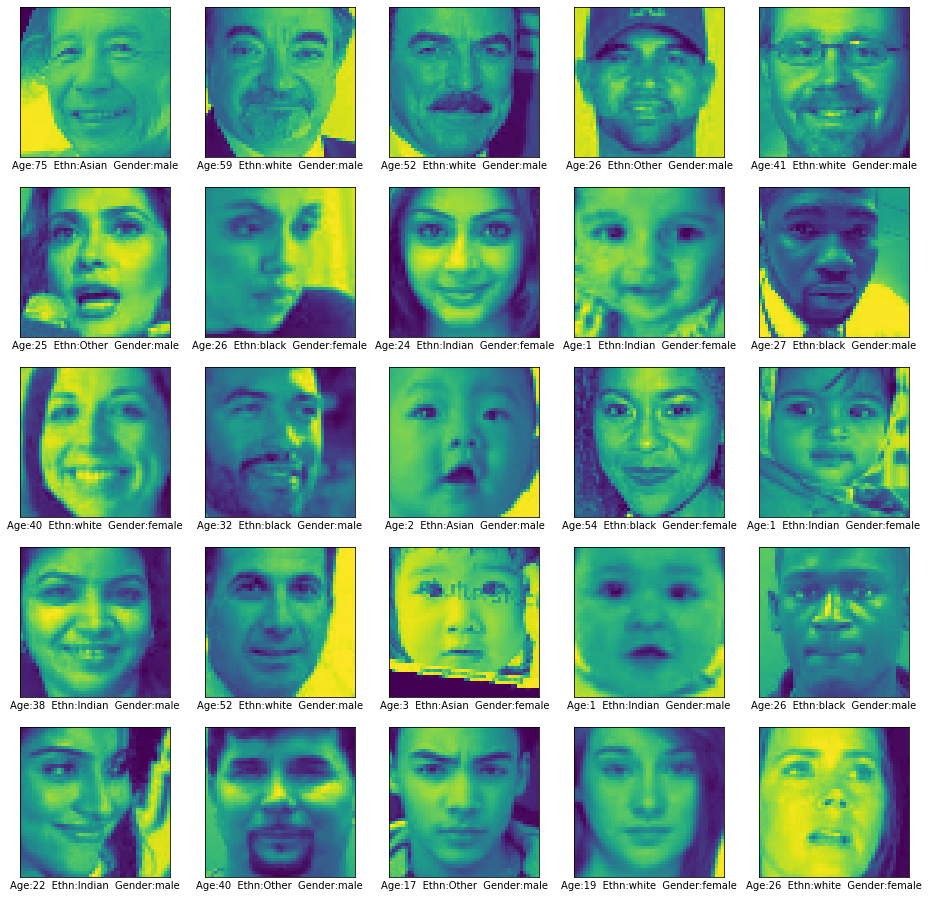

In [37]:
plt.figure(figsize=(16, 16))
for i, a in zip(np.random.randint(0, 23705, 25), range(1, 26)):
    plt.subplot(5, 5, a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i])
    plt.xlabel(
        "Age:"+str(y['age'].iloc[i]) +
        "  Ethn:"+str(dados_plotagem_y['ethnicity'].iloc[i]) +
        "  Gender:" + str(dados_plotagem_y['gender'].iloc[i])
    )
plt.show()
